# **Titanic Survivor Analysis**

In [493]:
import pandas as pd
import numpy as np

In [494]:
titanic= pd.read_csv('/content/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [495]:
#show maximum null values column
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [496]:
#quick view of the dataframe
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [497]:
titanic.shape

(891, 12)

In [498]:
titanic.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q



# Description of the attributes of the dataset
Pclass: Passenger class, (1 = 1st, 2 = 2nd, 3 = 3rd)

Survived: Survival,(0 = No, 1 = Yes)

Name: Name

Sex: Sex

Age: Age

SibSp: Number of Siblings/Spouses aboard the Titanic

Parch: Number of Parents /Children aboard the Titanic

Ticket: Ticket number

Fare: Passenger fare(British Pound)

Cabin: Cabin number

Embarked: Port of Embarkation(C = Cherbourg, Q = Queenstown, S = Southampton)


In [499]:
#remove the 'Cabin' column from the dataset as it contains too many missing values

titanic.pop('Cabin')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Now, let's change some of the data from numbers/quantitative data to categories/qualitative data. 
We'll change the data in the Survived column from ones and zeros to 'Survived' and 'Died', and we'll change the classes to '1st Class', '2nd Class', and '3rd Class'.

In [500]:
# Create Survival Label Column
titanic['Survival'] = titanic.Survived.map({0 : 'Died', 1 : 'Survived'})
titanic.Survival.head()

0        Died
1    Survived
2    Survived
3    Survived
4        Died
Name: Survival, dtype: object

In [501]:
# Create Pclass Label Column
titanic['Class'] = titanic.Pclass.map({1 : 'First Class', 2 : 'Second Class', 3 : 'Third Class'})
titanic.Class.head()

0    Third Class
1    First Class
2    Third Class
3    First Class
4    Third Class
Name: Class, dtype: object

In [502]:
#correlation: it will simply tell the values of corr of every column with every column
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [503]:
#mean value of female and male with age column
titanic.groupby(['Sex'])['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

### **SEX**

In [504]:
#Difference in survival between Male and Female.  How many females survived and how many males?

male_female_survival = titanic.groupby('Sex').sum()['Survived']
male_female_survival

Sex
female    233
male      109
Name: Survived, dtype: int64

In [505]:
import matplotlib.pyplot as plt
%matplotlib inline


([<matplotlib.patches.Wedge at 0x7f78f1188850>,
 [Text(-0.5931585979711493, 0.9263708100177275, 'female'),
  Text(0.5931586847042417, -0.9263707544822074, 'male')])

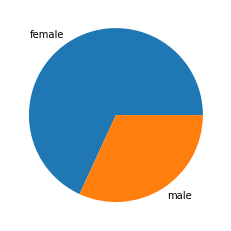

In [506]:
#pie chart showing total male and female survivals

sex_vals=[233, 109]
sex_labels=['female','male']
plt.pie(sex_vals,labels=sex_labels)

In [507]:
#total number of male passengers and total number of female passengers

total_male_female = titanic['Sex'].value_counts()
total_male_female


male      577
female    314
Name: Sex, dtype: int64

In [508]:
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


female    0.742038
male      0.188908
dtype: float64


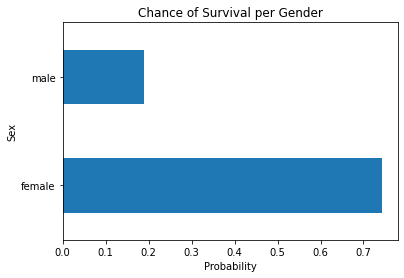

In [509]:
#calculate probability of survival for male passengers and for female passengers, then plot the result

male_female_percentages = male_female_survival/total_male_female
print(male_female_percentages)
prob_gender = male_female_percentages.plot(kind='barh',title='Chance of Survival per Gender')
prob_gender.set_xlabel('Probability');
prob_gender.set_ylabel('Sex');

It looks like there were over twice as many female survivors as there were male survivors, which may suggest a higher chance of survival if you were a female on the Titanic. It's even more apparent when looking at the percentage of men that survived compared to the percentage of women. If you were a woman, you had almost a 75% chance of survival, but men had a little less than 20% chance.


### **Class**

In [510]:
#Difference in survival based on class

class_survival = titanic.groupby('Class').sum()['Survived']
class_survival

Class
First Class     136
Second Class     87
Third Class     119
Name: Survived, dtype: int64

Interesting! It looks like you may have had a greater chance of survival if you were in third class as opposed to second class. Let's take a closer look by finding the probabilities for each class instead of just the total number of survivors for each class.

In [511]:
#Find the probabilites for each class.
#First print the total number of passengers in each class, then output the probabilities.

num_class = titanic['Class'].value_counts()
print(num_class)
percent_survived = class_survival/num_class
print(percent_survived)


Third Class     491
First Class     216
Second Class    184
Name: Class, dtype: int64
First Class     0.629630
Second Class    0.472826
Third Class     0.242363
dtype: float64


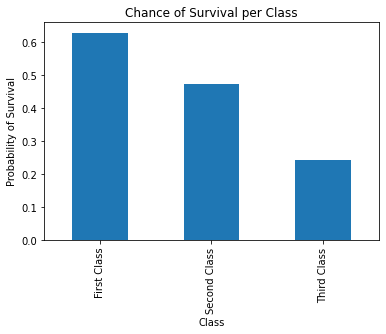

In [512]:
#plot the resulting probabilities

class_survival = percent_survived.plot(kind='bar',title='Chance of Survival per Class')

class_survival.set_xlabel('Class');
class_survival.set_ylabel('Probability of Survival');



That looks about right. The lower, or 3rd class, passengers were the least likely to survive, followed by the 2nd class, and then the 1st class at the top of the pack. So far, we would have wanted to be a first class woman had we been traveling on the Titanic that day.

### **AGE and FARE**

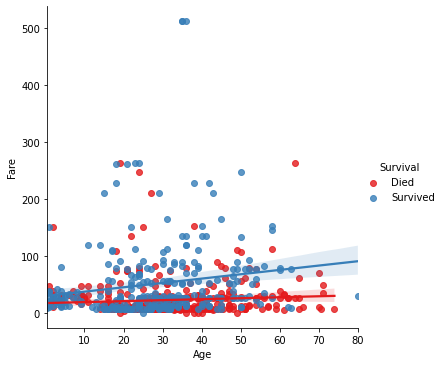

In [513]:
#create a separate dataset that removes all rows without an age

unknown_age_removed = titanic.dropna(axis=0,how='any')

#Ages of Survivors and Non Survivors and each person's fare
# 0 = Did not survive
# 1 = Survived

age_survived_and_not = sns.lmplot(x='Age', y='Fare', hue='Survival', data=unknown_age_removed, palette='Set1')

In [514]:
#describe the ages of passengers on the Titanic

unknown_age_removed['Age'].describe()


count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

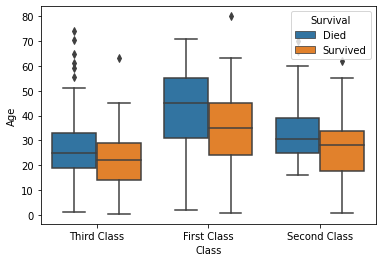

In [515]:
#boxplot showing survival of the ages per class

age_class_plot = sns.boxplot(x='Class',y='Age',hue='Survival',data=unknown_age_removed)


In [516]:
#Taking in the original dataset, put each person into one of four age groups: 
#Infant under 2, Child 2-12yrs, Adult 13-50yrs, or Older Adult 50+.

bins = [0,1,13,50,85]
age_groups = ['Infant','Child','Adult','Older Adult']
titanic['Age'] = pd.cut(titanic['Age'],bins,labels = age_groups)
titanic.head(10)

    


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survival,Class
0,1,0,3,"Braund, Mr. Owen Harris",male,Adult,1,0,A/5 21171,7.2500,S,Died,Third Class
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,71.2833,C,Survived,First Class
2,3,1,3,"Heikkinen, Miss. Laina",female,Adult,0,0,STON/O2. 3101282,7.9250,S,Survived,Third Class
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adult,1,0,113803,53.1000,S,Survived,First Class
4,5,0,3,"Allen, Mr. William Henry",male,Adult,0,0,373450,8.0500,S,Died,Third Class
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,Died,Third Class
6,7,0,1,"McCarthy, Mr. Timothy J",male,Older Adult,0,0,17463,51.8625,S,Died,First Class
7,8,0,3,"Palsson, Master. Gosta Leonard",male,Child,3,1,349909,21.0750,S,Died,Third Class
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,Adult,0,2,347742,11.1333,S,Survived,Third Class
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,Adult,1,0,237736,30.0708,C,Survived,Second Class


In [517]:
#placing each persons age in the age groups
def find_age_group(row):
    
    #For unknown ages, find the best 'Age' group by looking at the form of address in each name.
    #For 'Miss' and 'Master', put them in the 'Child' age group, and for 'Mrs', 'Mr.', and 'Dr.', put them in the 'Adult' age group
        
    if 'Miss.' in row['Name']:
        if pd.isnull(row['Age']):
            row['Age'] = 'Child'
        
    if 'Master.' in row['Name']:
        if pd.isnull(row['Age']):
            row['Age'] = 'Child'
            
    if 'Mrs.' in row['Name']:
        if pd.isnull(row['Age']):
            row['Age'] = 'Adult'
            
    if 'Mr.' in row['Name']:
        if pd.isnull(row['Age']):
            row['Age'] = 'Adult'
        
    if 'Dr.' in row['Name']:
        if pd.isnull(row['Age']):
            row['Age'] = 'Adult' 
        
    return row
        


In [518]:
titanic = titanic.apply(find_age_group,axis=1)

In [519]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survival,Class
0,1,0,3,"Braund, Mr. Owen Harris",male,Adult,1,0,A/5 21171,7.2500,S,Died,Third Class
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,71.2833,C,Survived,First Class
2,3,1,3,"Heikkinen, Miss. Laina",female,Adult,0,0,STON/O2. 3101282,7.9250,S,Survived,Third Class
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adult,1,0,113803,53.1000,S,Survived,First Class
4,5,0,3,"Allen, Mr. William Henry",male,Adult,0,0,373450,8.0500,S,Died,Third Class


In [520]:
#number of survivors in each age group

each_age_group = titanic.groupby('Age').sum()['Survived']
each_age_group


Age
Adult          254
Child           54
Infant          12
Older Adult     22
Name: Survived, dtype: int64

In [521]:
#number of passengers in each age group

num_in_group = titanic['Age'].value_counts(sort=False)
print(num_in_group)

#chance of survival for those in each age group

age_survival = each_age_group/num_in_group
age_survival.sort_values(inplace=True)



Child           97
Older Adult     64
Adult          716
Infant          14
Name: Age, dtype: int64


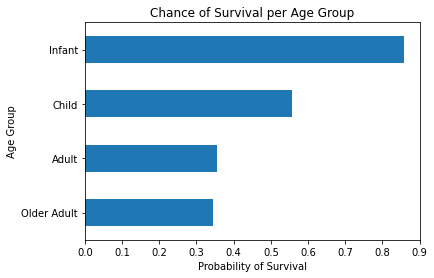

In [522]:
#let's take a look at a visual for age by plotting the probabilities

ap = age_survival.plot(kind='barh',title='Chance of Survival per Age Group')

ap.set_ylabel('Age Group');
ap.set_xlabel('Probability of Survival');



### **Embarked**

In [523]:
#Embark port and survived
titanic.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

([<matplotlib.patches.Wedge at 0x7f78f0d7e910>,
 [Text(0.2317530009344764, 1.0753095119814875, 'C'),
  Text(-0.948200534755921, -0.5575981939430809, 'Q'),
  Text(0.7448535253311662, -0.8094400693082433, 'S')])

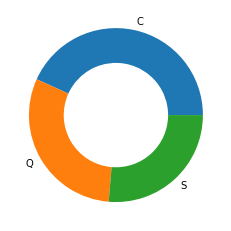

In [524]:
#Pie Chart of Embarked the port and survived
embarked=[0.553571,0.389610,0.336957]
embarked_labels=['C','Q','S']
plt.pie(embarked,labels=embarked_labels, wedgeprops={'width': 0.4})

### **Conclusion:**

**So, by looking at the data visualisation, we were able to make some assumptions when considering Sex, Class, Age, and Fair data.**

1.Females were of high chance of survival. 

2.Passengers from the First Class were higher survival rate. 

3.First class Females were the top survivals with the family than the First class Males.

4.Passengers who were travelling with spouse/childrens ie. with the family were higher chance of survival over the alone travellers.

5.Infants were survived higher percentage than all the age groups with respect to toal numbers of passengers in the age group.

6.Passengers who embarked the journey from Cherbourg, survived with higher ratio.

7.overall woman had almost a 75% chance of survival, but men had a little less than 20% chance.